In [22]:
# pip install crewai==0.28.8 crewai_tools==0.1.6 langchain_community==0.0.29

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
import openai
from openai import OpenAI
import json
import os

In [ ]:
ACCESS_KEY = "자신의 Access Key를 입력하세요."

client = OpenAI(api_key = ACCESS_KEY)
os.environ["OPENAI_API_KEY"] = ACCESS_KEY

In [25]:
base_url = "https://raw.githubusercontent.com/Hanyang-HCC-Lab/Agent-Tutorial/main/"

In [26]:
kwcs_1 = pd.read_csv(base_url + "Survey(KWCS)_1.csv")
kwcs_2 = pd.read_csv(base_url + "Survey(KWCS)_2.csv")
kwcs_3 = pd.read_csv(base_url + "Survey(KWCS)_3.csv")
kwcs_4 = pd.read_csv(base_url + "Survey(KWCS)_4.csv")
kwcs_5 = pd.read_csv(base_url + "Survey(KWCS)_5.csv")
kwcs_6 = pd.read_csv(base_url + "Survey(KWCS)_6.csv")

In [27]:
kwcs_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9833 entries, 0 to 9832
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Occupation                    9833 non-null   int64  
 1   weekly_hours                  9833 non-null   float64
 2   daily_work_hours_consistency  9833 non-null   float64
 3   weekly_work_days_consistency  9833 non-null   float64
 4   fixed_commute_times           9833 non-null   float64
 5   shift_work_status             9833 non-null   float64
 6   overtime_exceeds_10hrs        9833 non-null   int64  
 7   works_on_saturdays            9833 non-null   int64  
 8   works_on_sundays              9833 non-null   int64  
 9   satisfaction                  9833 non-null   int64  
dtypes: float64(5), int64(5)
memory usage: 768.3 KB


In [28]:
occ_mapping = {
    1: "manager", # 관리자
    2: "professional", # 전문가 및 관련 종사자
    3: "office_worker", # 사무 종사자
    4: "service_worker", # 서비스 종사자
    5: "sales_worker", # 판매 종사자
    6: "agriculture_worker", # 농립어업 숙련 종사자
    7: "skilled_worker", # 기능원 및 관련 기능 종사자
    8: "machine_operator", # 장치/기계 조작 및 조립 종사자
    9: "simple_laborer" # 단순노무 종사자
}

In [29]:
def filter_occ_by_id(data_id):
    # 데이터프레임 변수명을 동적으로 만들기 위해 globals() 사용
    df_name = f"kwcs_{data_id}"
    df = globals().get(df_name)  # 해당 데이터프레임 가져오기

    # Occupation 값에 따라 각각의 데이터프레임 생성
    for occ_value, occ_name in occ_mapping.items():
        filtered_df = df[df['Occupation'] == occ_value]
        # 필터된 데이터프레임을 직업군 이름을 포함한 변수로 저장
        globals()[f"{df_name}_{occ_name}"] = filtered_df

    # 각 차년도에 생성된 변수들을 출력
    print(f"\n{data_id}차년도에 생성된 변수들: \n{', '.join([f'{df_name}_{occ_name}' for occ_name in occ_mapping.values()])}")

In [30]:
# kwcs_1부터 kwcs_6까지의 데이터프레임 각각에 대해 실행
for i in range(1, 7):
    filter_occ_by_id(i)


1차년도에 생성된 변수들: 
kwcs_1_manager, kwcs_1_professional, kwcs_1_office_worker, kwcs_1_service_worker, kwcs_1_sales_worker, kwcs_1_agriculture_worker, kwcs_1_skilled_worker, kwcs_1_machine_operator, kwcs_1_simple_laborer

2차년도에 생성된 변수들: 
kwcs_2_manager, kwcs_2_professional, kwcs_2_office_worker, kwcs_2_service_worker, kwcs_2_sales_worker, kwcs_2_agriculture_worker, kwcs_2_skilled_worker, kwcs_2_machine_operator, kwcs_2_simple_laborer

3차년도에 생성된 변수들: 
kwcs_3_manager, kwcs_3_professional, kwcs_3_office_worker, kwcs_3_service_worker, kwcs_3_sales_worker, kwcs_3_agriculture_worker, kwcs_3_skilled_worker, kwcs_3_machine_operator, kwcs_3_simple_laborer

4차년도에 생성된 변수들: 
kwcs_4_manager, kwcs_4_professional, kwcs_4_office_worker, kwcs_4_service_worker, kwcs_4_sales_worker, kwcs_4_agriculture_worker, kwcs_4_skilled_worker, kwcs_4_machine_operator, kwcs_4_simple_laborer

5차년도에 생성된 변수들: 
kwcs_5_manager, kwcs_5_professional, kwcs_5_office_worker, kwcs_5_service_worker, kwcs_5_sales_worker, kwcs_5_agric

In [31]:
# 함수 정의: 데이터 분석 및 시각화
def analyze_occupation(clustered_by_occupation):
    # 각 직업별로 나누어진 데이터에서 각 변수의 평균값을 계산하여 반환
    mean_values = clustered_by_occupation.mean()
    # 평균값을 출력
    print(f"\n각 변수의 평균값:\n", mean_values)

    return mean_values

In [32]:
kwcs_1_manager_mean = analyze_occupation(kwcs_1_manager)


각 변수의 평균값:
 Occupation                       1.000000
weekly_hours                    49.432653
daily_work_hours_consistency     0.861224
weekly_work_days_consistency     0.844898
fixed_commute_times              0.824490
shift_work_status                0.048980
overtime_exceeds_10hrs           0.510204
works_on_saturdays               0.644898
works_on_sundays                 0.289796
satisfaction                     1.906122
dtype: float64


In [33]:
kwcs_1_professional_mean = analyze_occupation(kwcs_1_professional)


각 변수의 평균값:
 Occupation                       2.000000
weekly_hours                    45.945663
daily_work_hours_consistency     0.834128
weekly_work_days_consistency     0.902765
fixed_commute_times              0.866540
shift_work_status                0.080076
overtime_exceeds_10hrs           0.528122
works_on_saturdays               0.652526
works_on_sundays                 0.279314
satisfaction                     2.087703
dtype: float64


In [34]:
kwcs_1_office_worker_mean = analyze_occupation(kwcs_1_office_worker)


각 변수의 평균값:
 Occupation                       3.000000
weekly_hours                    45.703677
daily_work_hours_consistency     0.904831
weekly_work_days_consistency     0.942322
fixed_commute_times              0.936554
shift_work_status                0.048306
overtime_exceeds_10hrs           0.483057
works_on_saturdays               0.573901
works_on_sundays                 0.232877
satisfaction                     2.054795
dtype: float64


In [35]:
kwcs_1_service_worker_mean = analyze_occupation(kwcs_1_service_worker)


각 변수의 평균값:
 Occupation                       4.000000
weekly_hours                    59.678535
daily_work_hours_consistency     0.810783
weekly_work_days_consistency     0.859613
fixed_commute_times              0.725331
shift_work_status                0.082401
overtime_exceeds_10hrs           0.696846
works_on_saturdays               0.863683
works_on_sundays                 0.602238
satisfaction                     2.418108
dtype: float64


In [36]:
kwcs_1_sales_worker_mean = analyze_occupation(kwcs_1_sales_worker)


각 변수의 평균값:
 Occupation                       5.000000
weekly_hours                    58.649758
daily_work_hours_consistency     0.813205
weekly_work_days_consistency     0.874396
fixed_commute_times              0.706924
shift_work_status                0.058776
overtime_exceeds_10hrs           0.647343
works_on_saturdays               0.835749
works_on_sundays                 0.500805
satisfaction                     2.273752
dtype: float64


In [37]:
kwcs_1_agriculture_worker_mean = analyze_occupation(kwcs_1_agriculture_worker)


각 변수의 평균값:
 Occupation                       6.000000
weekly_hours                    50.122841
daily_work_hours_consistency     0.335893
weekly_work_days_consistency     0.339731
fixed_commute_times              0.190019
shift_work_status                0.005758
overtime_exceeds_10hrs           0.635317
works_on_saturdays               0.869482
works_on_sundays                 0.798464
satisfaction                     2.602687
dtype: float64


In [38]:
kwcs_1_skilled_worker_mean = analyze_occupation(kwcs_1_skilled_worker)


각 변수의 평균값:
 Occupation                       7.000000
weekly_hours                    49.660335
daily_work_hours_consistency     0.748045
weekly_work_days_consistency     0.707263
fixed_commute_times              0.756425
shift_work_status                0.104469
overtime_exceeds_10hrs           0.676536
works_on_saturdays               0.818994
works_on_sundays                 0.437430
satisfaction                     2.484916
dtype: float64


In [39]:
kwcs_1_machine_operator_mean = analyze_occupation(kwcs_1_machine_operator)


각 변수의 평균값:
 Occupation                       8.000000
weekly_hours                    54.352789
daily_work_hours_consistency     0.683528
weekly_work_days_consistency     0.730220
fixed_commute_times              0.613489
shift_work_status                0.151751
overtime_exceeds_10hrs           0.738003
works_on_saturdays               0.869001
works_on_sundays                 0.561608
satisfaction                     2.581064
dtype: float64


In [40]:
kwcs_1_simple_laborer_mean = analyze_occupation(kwcs_1_simple_laborer)


각 변수의 평균값:
 Occupation                       9.000000
weekly_hours                    48.910804
daily_work_hours_consistency     0.830402
weekly_work_days_consistency     0.850503
fixed_commute_times              0.840452
shift_work_status                0.162060
overtime_exceeds_10hrs           0.500000
works_on_saturdays               0.755025
works_on_sundays                 0.364322
satisfaction                     2.376884
dtype: float64


In [41]:
kwcs_1_mean = analyze_occupation(kwcs_1)


각 변수의 평균값:
 Occupation                       4.854266
weekly_hours                    50.772704
daily_work_hours_consistency     0.785620
weekly_work_days_consistency     0.815824
fixed_commute_times              0.763246
shift_work_status                0.085122
overtime_exceeds_10hrs           0.600122
works_on_saturdays               0.752568
works_on_sundays                 0.418590
satisfaction                     2.296756
dtype: float64


In [42]:
def create_interview_prompt(role, role_description, weekly_hours, daily_work_hours_consistency, weekly_work_days_consistency, fixed_commute_times, shift_work_status, overtime_exceeds_10hrs, works_on_saturdays, works_on_sundays):
    return (
        f"당신은 {role}로, 직업군에 대한 페르소나를 구축하기 위해 인터뷰를 받고 있습니다."
        "일반적으로 모든 직업군의 평균 주간 근무 시간은 50.8시간입니다."
        "또한, 근로자의 78%는 매일 동일한 근무 시간을 가지고 있으며, 82%는 매주 동일한 근무 일수를 가지고 있습니다."
        "76%는 정해진 출퇴근 시간을 가지고 있으며, 9%는 교대 근무에 종사하고 있습니다."
        "60%는 하루 10시간 이상 일하고, 75%는 토요일에 근무하며, 42%는 일요일에 근무합니다."
        "이러한 일반적인 경향에 근거하여 현실적이고 상세하게 응답해 주십시오."
        f"\n\n"
        f"당신의 직업군을 설명해주시겠습니까?\n"
        f"{role_description}\n"
        f"\n"
        f"당신은 직장에서 일주일동안 실제 몇 시간 일하십니까?\n"
        f"{weekly_hours}시간 입니다. 평균 근무시간보다 {'많이' if weekly_hours > 50.8 else '적게'} 일합니다.\n"
        f"\n"
        f"당신은 매일 근무시간의 길이가 같습니까? \n"
        f"{'네, 매일 근무시간의 길이가 같습니다.' if daily_work_hours_consistency > 0.5 else '아니요, 매일 근무시간의 길이가 다릅니다.'}\n"
        f"\n"
        f"당신은 매주 근무 일수가 같습니까? \n"
        f"{'네, 매주 근무 일수가 같습니다.' if weekly_work_days_consistency > 0.5 else '아니요, 매주 근무 일수가 다릅니다.'}\n"
        f"\n"
        f"당신은 출퇴근 시각이 정해져 있습니까? \n"
        f"{'네, 출퇴근 시각이 정해져 있습니다.' if fixed_commute_times > 0.5 else '아니요, 출퇴근 시각이 유동적입니다.'}\n"
        f"\n"
        f"당신은 교대근무를 합니까? \n"
        f"{'아니요, 교대근무를 하지 않습니다.' if shift_work_status > 0.5 else '네, 교대근무를 합니다.'}\n"
        f"\n"
        f"당신은 하루 10시간 초과근무를 합니까? \n"
        f"{'네, 하루에 10시간 초과근무를 합니다.' if overtime_exceeds_10hrs > 0.5 else '아니요, 초과근무를 하지 않습니다.'}\n"
        f"\n"
        f"당신은 토요일에 근무를 하십니까? \n"
        f"{'네, 토요일에 근무를 합니다.' if works_on_saturdays > 0.5 else '아니요, 토요일에 근무하지 않습니다.'}\n"
        f"\n"
        f"당신은 일요일에 근무를 하십니까? \n"
        f"{'네, 일요일에 근무를 합니다.' if works_on_sundays > 0.5 else '아니요, 일요일에 근무하지 않습니다.'}\n"
    )

In [43]:
def generate_interview_response(role, role_description, weekly_hours, daily_work_hours_consistency, weekly_work_days_consistency, fixed_commute_times, shift_work_status, overtime_exceeds_10hrs, works_on_saturdays, works_on_sundays):
    prompt = create_interview_prompt(role, role_description, weekly_hours, daily_work_hours_consistency, weekly_work_days_consistency, fixed_commute_times, shift_work_status, overtime_exceeds_10hrs, works_on_saturdays, works_on_sundays)
    response = openai.chat.completions.create(
        model="gpt-4o-mini",
        messages=[
            {"role": "system", "content": prompt},
            {"role": "user", "content": '''
당신의 인터뷰 내용을 바탕으로 근로 환경에 대한 만족도를 0에서 100점 사이로 평가해 주세요.
0점은 완전 불만족, 100점은 완벽한 만족을 의미합니다.
평가할 때, 주어진 응답의 모든 요소(주간 근무 시간, 근무 일수의 일관성, 초과근무, 교대근무 여부 등)를 종합적으로 고려해 주십시오.
만족도는 직업군 평균에 비해 얼마나 좋거나 나쁜지에 따라 엄격하게 평가해 주시고, 평가한 점수에 대한 구체적인 이유를 포함하여 답변해 주시기 바랍니다.

점수와 이유를 반드시 다음 JSON 형식으로만 작성해 주세요:

{"점수": 숫자, "이유": "설명"}
'''
            }
        ]
    )
    return response.choices[0].message.content

In [44]:
# 각 직업군의 평균값을 정리하는 단계
def generate_response(role, role_description, mean_values):
    response = generate_interview_response(
        role=role,
        role_description=role_description,
        weekly_hours=round(mean_values['weekly_hours'], 2),
        daily_work_hours_consistency=round(mean_values['daily_work_hours_consistency'], 2),
        weekly_work_days_consistency=round(mean_values['weekly_work_days_consistency'], 2),
        fixed_commute_times=round(mean_values['fixed_commute_times'], 2),
        shift_work_status=round(mean_values['shift_work_status'], 2),
        overtime_exceeds_10hrs=round(mean_values['overtime_exceeds_10hrs'], 2),
        works_on_saturdays=round(mean_values['works_on_saturdays'], 2),
        works_on_sundays=round(mean_values['works_on_sundays'], 2)
    )
    return response

In [45]:
manager_response = generate_response(
    role="관리자",
    role_description="저는 관리자로서 회사의 경영을 총괄하고 중요한 결정을 내립니다.",
    mean_values=kwcs_1_manager_mean
)
manager_response

'{"점수": 65, "이유": "주간 근무 시간이 평균보다 적고, 근무 일수가 일정하며, 출퇴근 시간이 정해져 있어 일정한 리듬을 유지하는 데 도움됩니다. 하지만 교대근무와 하루 10시간 초과근무는 피로를 유발할 수 있어 불만족스러운 요소입니다. 또한, 토요일 근무는 주말의 휴식 시간을 제한하기 때문에 추가적인 스트레스를 느낍니다. 전반적으로 안정적인 근무 패턴이 있지만, 초과근무와 주말 근무로 인한 부담이 있어 중간 수준의 만족도를 평가합니다."}'

In [46]:
professional_response = generate_response(
    role="전문가 및 관련 종사자",
    role_description="저는 전문 지식과 기술을 활용하여 복잡한 전문적 업무를 수행하고, 관련 분야에서 중요한 업무를 담당합니다.",
    mean_values=kwcs_1_professional_mean
)
professional_response

'{"점수": 65, "이유": "주간 근무 시간이 평균보다 적고, 근무 일수와 출퇴근 시간이 정해져 있어 일정한 생활 리듬을 유지할 수 있지만, 교대 근무와 하루 10시간 이상의 초과 근무로 인해 근무 강도가 높아지는 점이 불만족 요인입니다. 주말에 토요일 근무가 필수인 것도 스트레스를 느끼게 합니다. 전반적으로 평균 직업환경보다 나은 점이 있지만, 상당한 근무 강도로 인해 만족도가 낮아지는 상황입니다."}'

In [47]:
office_worker_response = generate_response(
    role="사무 종사자",
    role_description="저는 사무 업무를 처리하며, 데이터 입력, 파일 관리, 문서 작성 등의 일을 통해 사무실의 원활한 운영을 지원합니다.",
    mean_values=kwcs_1_office_worker_mean
)
office_worker_response

'{"점수": 80, "이유": "저는 평균 근무 시간보다 덜 일하고, 매일 동일한 근무 시간 및 일수로 일하기 때문에 안정적인 근무 환경을 가지고 있습니다. 출퇴근 시간이 정해져 있어 일과 생활의 균형도 잘 유지하고 있습니다. 하지만 교대 근무를 하고 있으며, 토요일에 근무하는 점은 다소 부담을 줄 수 있습니다. 따라서 전체적으로 만족도가 높지만, 교대 근무와 토요일 근무로 인해 완벽한 만족은 아닙니다."}'

In [48]:
service_worker_response = generate_response(
    role="서비스 종사자",
    role_description="저는 고객 서비스를 제공하며, 고객의 요구를 충족시키고 훌륭한 고객 경험을 제공하기 위해 노력합니다.",
    mean_values=kwcs_1_service_worker_mean
)
service_worker_response

'{"점수": 45, "이유": "주간 근무 시간이 평균보다 훨씬 길고, 하루에 10시간 이상 초과 근무를 해야 하며, 주말에도 출근해야 하는 점 때문에 상당한 근로 환경 스트레스를 느끼고 있습니다. 또한 교대 근무로 인해 일관된 생활 패턴이 어렵고, 업무와 개인 생활의 균형을 유지하기 힘든 점이 불만족의 주요 원인입니다."}'

In [49]:
sales_worker_response = generate_response(
    role="판매 종사자",
    role_description="저는 상품이나 서비스를 고객에게 판매하며, 고객의 요구 사항을 파악하고 최적의 제품을 제공합니다.",
    mean_values=kwcs_1_sales_worker_mean
)
sales_worker_response

'{"점수": 65, "이유": "주간 근무 시간이 평균보다 다소 높은 편이며, 하루 10시간 이상의 초과근무도 발생하고 있어 근로 환경에 대한 부담이 큽니다. 하지만 매일 같은 근무 시간과 일정한 근무 일수, 정해진 출퇴근 시각 덕분에 일정한 리듬을 유지할 수 있어 어느 정도의 안정감이 있습니다. 교대 근무를 하더라도 일요일에는 근무하지 않으므로 반일 근무의 여지가 있어 어느 정도의 만족감이 존재합니다. 전반적으로 근무 환경은 평범한 편이나, 근무 시간이 길고 초과근무가 지속되는 점에서 완전한 만족을 느끼기 어려운 상황입니다."}'

In [50]:
agriculture_worker_response = generate_response(
    role="농립어업 숙련 종사자",
    role_description="저는 농장, 숲, 어업 등의 분야에서 숙련된 작업을 수행하며, 자연과 밀접한 환경에서 자원을 관리하고 생산합니다.",
    mean_values=kwcs_1_agriculture_worker_mean
)
agriculture_worker_response

'{"점수": 60, "이유": "근무 시간과 일수의 일관성이 부족하고, 교대 근무와 초과 근무가 잦아 체력적으로 힘든 상황입니다. 그러나 평균 주간 근무 시간보다 약간 적고, 자연과 함께 일하는 환경이 주는 만족감 덕분에 전체적으로 나쁘지 않은 평가를 내렸습니다. 하지만 출퇴근 시각의 유동성과 매주 일정하지 않은 근무 일수는 고민거리입니다."}'

In [51]:
skilled_worker_response = generate_response(
    role="기능원 및 관련 기능 종사자",
    role_description="저는 특정 기능 또는 기술을 활용하여 생산성을 높이고, 품질 있는 결과물을 만드는데 기여합니다.",
    mean_values=kwcs_1_skilled_worker_mean
)
skilled_worker_response

'{"점수": 65, "이유": "평균 주간 근무 시간(50.8시간)보다 약간 적은 49.66시간을 일하고 있으며, 매일 및 매주 일정한 근무 시간을 가지고 있어 규칙적인 생활을 유지할 수 있습니다. 그러나 교대근무와 하루 10시간 초과 근무가 이루어지고 있어 체력적으로 부담이 될 수 있으며, 토요일에 근무하는 점도 만족도를 낮춥니다. 일요일은 쉬지만, 전체적으로 업무의 강도가 높아 여전히 만족도가 떨어진다고 판단했습니다."}'

In [52]:
machine_operator_response = generate_response(
    role="장치/기계 조작 및 조립 종사자",
    role_description="저는 다양한 기계와 장비를 조작하고 조립하는 업무를 담당하여, 정확하고 효율적인 생산 활동을 지원합니다.",
    mean_values=kwcs_1_machine_operator_mean
)
machine_operator_response

'{"점수": 60, "이유": "주간 근무 시간인 54.35시간은 평균보다 높은 수준이며, 하루 10시간 이상의 초과근무와 토요일 및 일요일의 근무로 인해 업무 부담이 큽니다. 하지만 매일 근무시간의 일관성과 주간 근무 일수의 일관성이 있어 기본적인 일정 관리에는 만족하고 있습니다. 교대근무를 하고 있다는 점도 근무 환경의 유연성이 부족하다는 느낌을 주어 만족도를 낮추는 요인입니다. 전반적으로 업무 강도가 높고, 개인적인 시간 부족을 느끼므로 만족도는 평균 이하입니다."}'

In [53]:
simple_laborer_response = generate_response(
    role="단순노무 종사자",
    role_description="저는 단순하거나 반복적인 노동을 수행하며, 특정 작업을 빠르고 효과적으로 완수하는 데 중점을 둡니다.",
    mean_values=kwcs_1_simple_laborer_mean
)
simple_laborer_response

'{"점수": 75, "이유": "주간 근무 시간이 평균보다 약간 적고, 매일 및 매주 근무 일수가 동일한 점은 긍정적입니다. 그러나 교대근무를 하고 있어 약간의 불안정성이 존재하며, 일요일에는 근무하지 않아 주말을 충분히 쉴 수 있다는 점이 만족스러운 편입니다. 초과근무를 하지 않는 것도 긍정적 요소입니다. 전반적으로 균형 잡힌 근로 환경을 가지고 있으나 교대근무로 인해 만족도가 약간 낮아졌습니다."}'

In [54]:
# 점수만 리스트로 정리하는 함수 정의
def extract_scores(responses):
    scores = []
    for response in responses:
        # JSON 형식의 응답을 딕셔너리로 변환하여 점수 추출
        response_dict = json.loads(response)
        scores.append(response_dict["점수"])
    return scores

# 9개 직업군의 인터뷰 응답을 저장한 리스트 예시 (responses)
# 각 인터뷰 응답에서 점수만 추출하여 리스트로 정리
occupation_scores = extract_scores([manager_response, professional_response, office_worker_response, service_worker_response, sales_worker_response, agriculture_worker_response, skilled_worker_response, machine_operator_response, simple_laborer_response])

# 점수 리스트 출력
print(occupation_scores)


[65, 65, 80, 45, 65, 60, 65, 60, 75]


In [55]:
# 각 직업군에 대한 평균값 데이터에서 satisfaction 값을 리스트로 추출하는 코드
occupation_means = [
    kwcs_1_manager_mean,
    kwcs_1_professional_mean,
    kwcs_1_office_worker_mean,
    kwcs_1_service_worker_mean,
    kwcs_1_sales_worker_mean,
    kwcs_1_agriculture_worker_mean,
    kwcs_1_skilled_worker_mean,
    kwcs_1_machine_operator_mean,
    kwcs_1_simple_laborer_mean
]

# satisfaction 값을 리스트로 추출
satisfaction_values = [round(occupation['satisfaction'],3) for occupation in occupation_means]

satisfaction_values


[1.906, 2.088, 2.055, 2.418, 2.274, 2.603, 2.485, 2.581, 2.377]

In [56]:
def plot_occupational_satisfaction(statistical_values, llm_agent_values):
    occupations = [
        "Manager", "Professional", "Office worker", "Service worker",
        "Sales worker", "Agriculture worker", "Skilled worker",
        "Machine operator", "Simple Laborer"
    ]

    # 통계적 값을 1-100으로 스케일링
    statistical_scaled = [100 - ((val - 1) / (4 - 1) * 100) for val in statistical_values]

    # Plotting
    plt.figure(figsize=(12, 6))
    sns.lineplot(x=occupations, y=statistical_scaled, label="Statistical Values (Scaled)", marker="o")
    sns.lineplot(x=occupations, y=llm_agent_values, label="LLM Agent Prediction", marker="o")

    # Customizing the plot
    plt.title("Comparison of Statistical Values and LLM Agent Predictions")
    plt.ylabel("Satisfaction Score (1-100 scale)")
    plt.xlabel("Occupations")
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()

    # Show the plot
    plt.show()

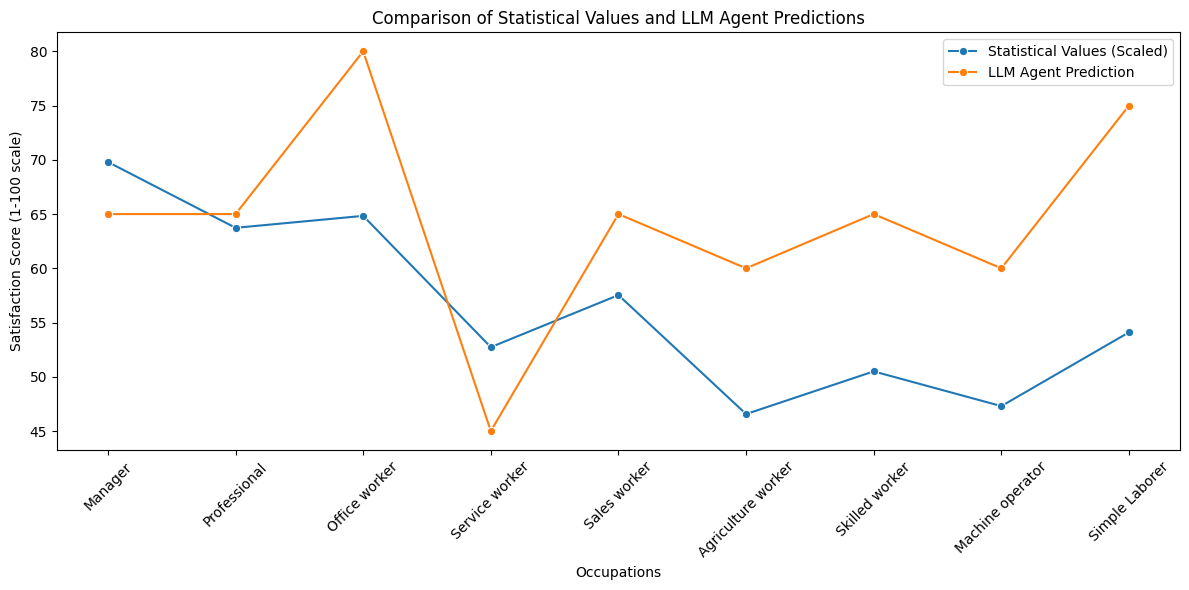

In [57]:
statistical_values = satisfaction_values
llm_agent_values = occupation_scores

# Calling the function
plot_occupational_satisfaction(statistical_values, llm_agent_values)